In [848]:
pip install scipy pandas scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [849]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn import metrics
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [850]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [851]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
dataset.shape

(200, 5)

In [852]:
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [853]:
dataset = dataset.drop('CustomerID', axis=1)

<Axes: >

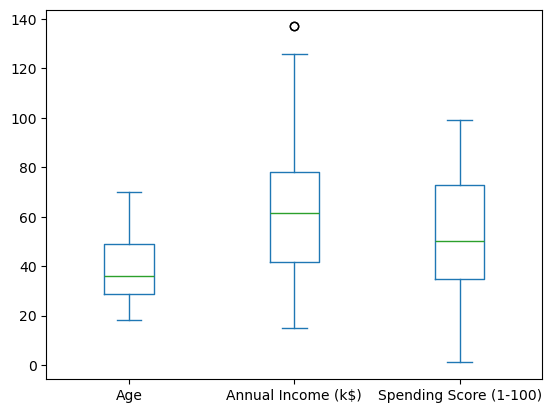

In [854]:
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='box')

Se Elimina el dato atipico filtrando la columna de ingreso anual por valores menores o iguales a 135

<Axes: >

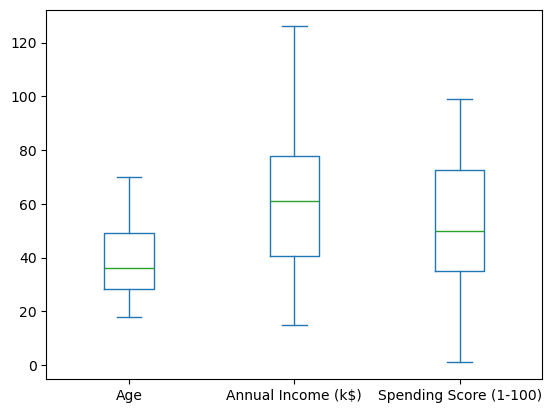

In [856]:
dataset = dataset[dataset["Annual Income (k$)"]<=135]
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='box')

In [857]:
dataset["Gender"].value_counts()

Gender
Female    112
Male       86
Name: count, dtype: int64

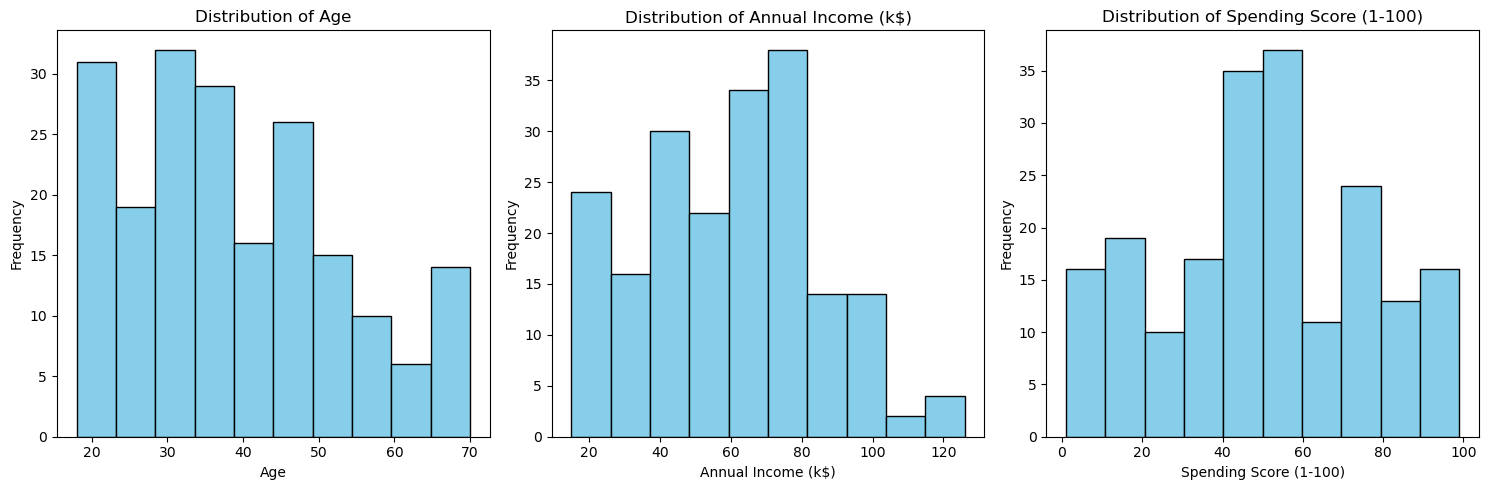

In [858]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Generación de histogramas para cada columna numérica
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)  # Crear subplots en una sola fila
    plt.hist(dataset[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()  # Ajuste para evitar superposiciones
plt.show()

<Axes: >

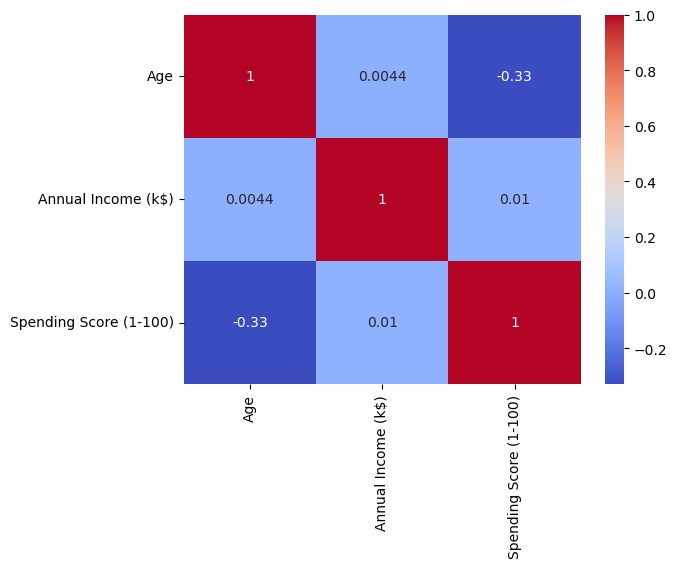

In [859]:
sns.heatmap(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')

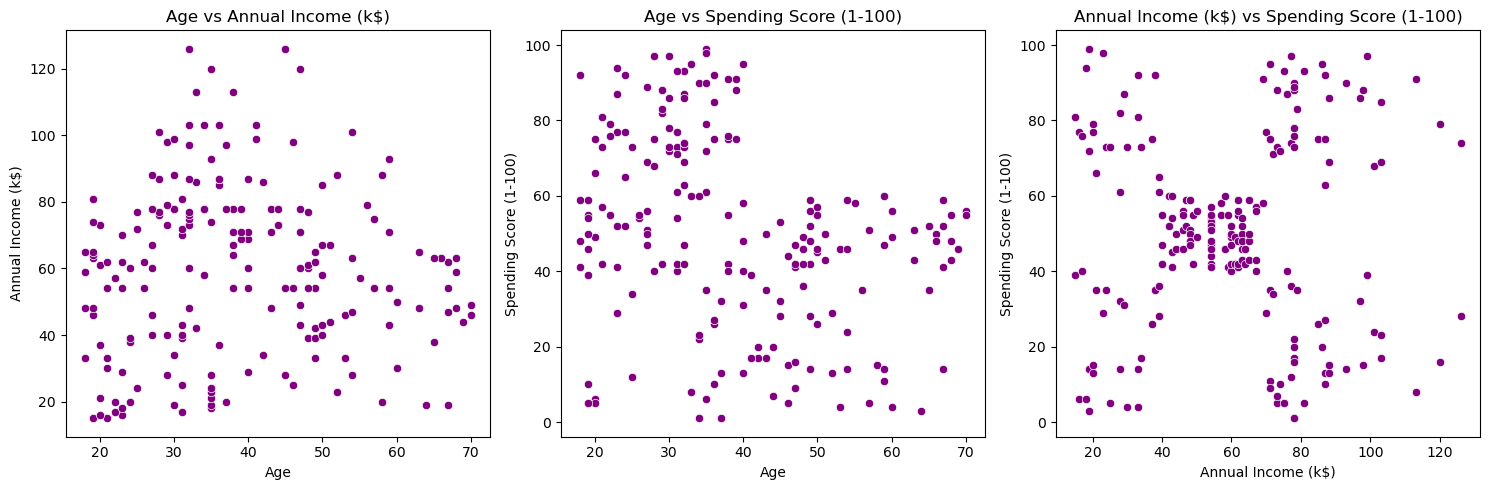

In [860]:
# Crear combinaciones de pares de columnas para scatter plots
pairs = [('Age', 'Annual Income (k$)'),
         ('Age', 'Spending Score (1-100)'),
         ('Annual Income (k$)', 'Spending Score (1-100)')]

# Crear una figura grande para contener todos los scatter plots
plt.figure(figsize=(15, 5))

# Generación de scatter plots para cada par de columnas
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)  # Configuración de 1 fila y 3 columnas para subplots
    sns.scatterplot(data=dataset, x=x, y=y, color='purple')
    plt.title(f'{x} vs {y}')

plt.tight_layout()  # Ajuste del espaciado
plt.show()

In [861]:
# Codificación de gender
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

In [862]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]), columns=numerical_columns)
X["Gender"] = dataset["Gender"]
X.describe()


,Age,Annual Income (k$),Spending Score (1-100),Gender
count,1.980000e+02,198.000000,1.980000e+02,198.000000
mean,1.435440e-16,0.000000,1.104616e-16,0.565657
std,1.002535e+00,1.002535,1.002535e+00,0.496927
min,-1.496937e+00,-1.779171,-1.915640e+00,0.000000
25%,-7.638208e-01,-0.766199,-5.917421e-01,0.000000
50%,-2.095134e-01,0.048151,-7.669638e-03,1.000000
75%,7.202926e-01,0.713534,8.781735e-01,1.000000
max,2.222287e+00,2.630236,1.900300e+00,1.000000


## K-Means

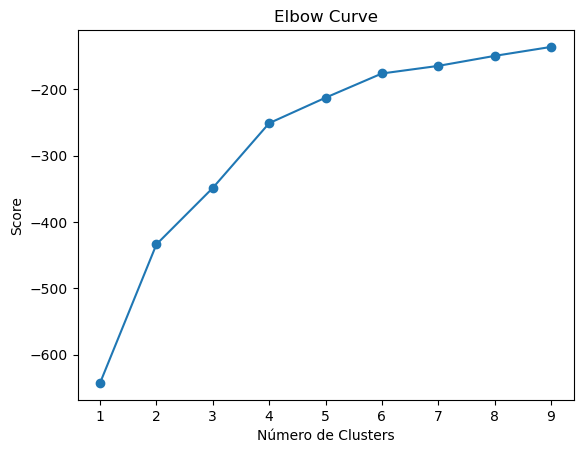

In [864]:
Nc = range (1, 10)
kmeans = [KMeans (n_clusters=i, random_state=42) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters') 
plt.ylabel('Score')
plt.title('Elbow Curve') 
plt.show()


In [865]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.18370556, -0.22743721, -0.06283203,  0.5625    ],
       [-0.4277519 ,  0.99338768,  1.21838324,  0.56410256],
       [-0.98302724, -0.74265894,  0.4689623 ,  0.59259259],
       [ 0.08222736,  0.99212786, -1.19938232,  0.5       ],
       [ 0.51701519, -1.33802154, -1.27623395,  0.63157895]])

In [866]:
labels = kmeans.labels_
colors = ["red", "orange", "purple", "blue", "green"]
assign = []

for row in labels:
    assign.append(colors[row])


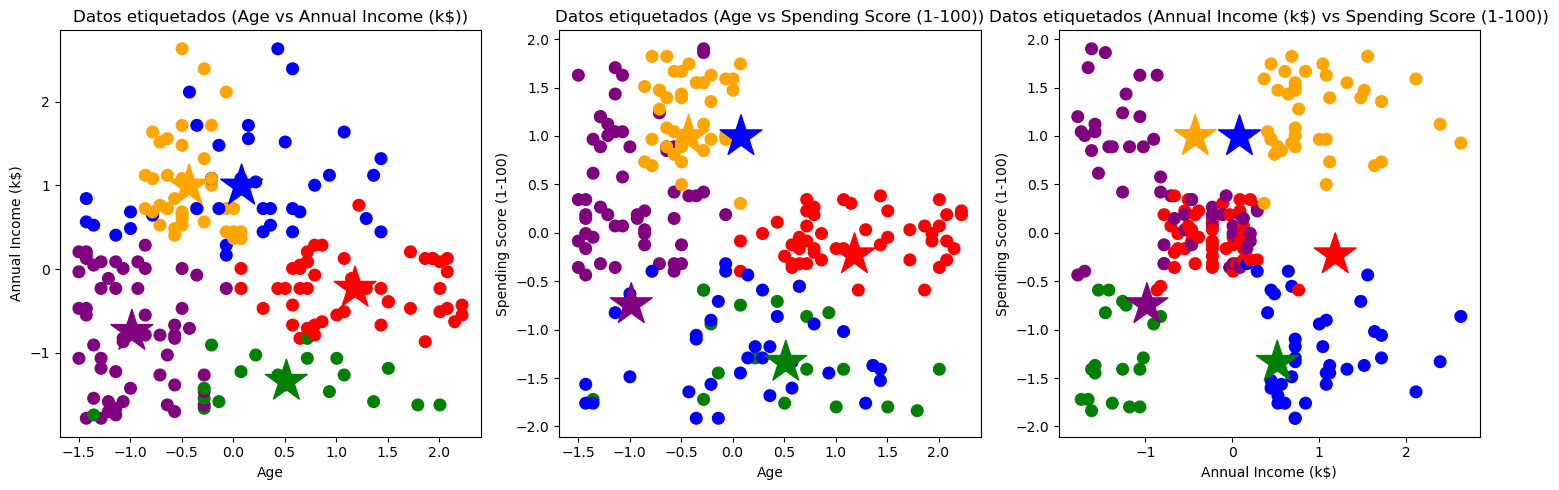

In [867]:
pairs = [('Age', 'Annual Income (k$)'),
         ('Age', 'Spending Score (1-100)'),
         ('Annual Income (k$)', 'Spending Score (1-100)')]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (f1_name, f2_name) in enumerate(pairs):
    f1 = X[f1_name].values
    f2 = X[f2_name].values 
    
    axs[i].scatter(f1, f2, c=assign, s=70) 
    axs[i].scatter(centroids[:, 0], centroids[:, 1], marker="*", c=colors, s=1000) 
    axs[i].set_title(f"Datos etiquetados ({f1_name} vs {f2_name})")
    axs[i].set_xlabel(f1_name)
    axs[i].set_ylabel(f2_name)

plt.tight_layout()  
plt.show()

In [868]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3616147764463262
Índice de Calinski-Harabasz: 97.52522511813476
Inertia (suma de cuadrados dentro de los clusters): 212.70892837972707
Davies-Bouldin Index: 1.0210233287012533


### Analisis

Durante el analisis exploratorio se identificó un dato atipico, el cual no necesariamente está mal, pero ayuda a normalizar un poco los datos

Los diagramas de distribución muestran como hay una frecuencia de clientes mayor de personas entre 20 y 50 años, que la mayoría de clientes tiene ingresos entre 20K y 80K y que el puntaje de gastos mas comun está entre 40 y 60.

El mapa de calor, muestra como hay una correlación negativa entre al edad y el puntaje de gasto, indicando que se tiende a gastar menos a mayor edad.

Se realiza la elbow curve para obtener una cantidad de clusters apropiada, en este caso 5

Se utiliza el algoritmo k-means para identificar los patrones de agrupamiento y se identifican algunos clusters de datos en cada grafica de correlación, visualmente el grafico de correlacion entre el ingreso anual y el gasto anual siene mas claramente agrupados los datos pero los centroides no se encuentran claramente ubicados.

Finalmente dadas las metricas de calidad, se identifica que el puntaje de silueta no es muy alto, lo que indica que los clusters están moderadamente definidos
